# Introduccion al Aprendizaje Automatizado

## TP 0: Generacion de datos en Python

### Ejercicio a

Para generar puntos de $n$ dimensiones con una distribucion normal multivariada y una matriz de covarianza diagonal, podemos generar cada una de sus coordenadas individualmente con una distribucion normal.

Definimos entonces una funcion que dado un punto $\mu = [ \mu_1, \ldots, \mu_n ] $ y una lista con los desvios estandar $\sigma = [ \sigma_1, \ldots, \sigma_n ]$, genera un punto al azar con distribucion normal, centrado en $\mu$ y con desvio estandar $\sigma$.

In [1]:
def mgauss(mu, sigma):
    from random import gauss
    return [gauss(mi, si) for mi, si in zip(mu, sigma)]

Luego necesitamos una funcion que reciba los mismos argumentos, pero ademas nos permita especificar la cantidad de puntos $n$ a generar y la etiqueta para dichos puntos.

In [2]:
def generate_class(n, sigma, mu, label):
    return [mgauss(mu, sigma) + [label] for _ in range(n)]

Ya estamos listos para solicitar los datos para trabajar. Necesitamos la cantidad de dimensiones, la cantidad de puntos a generar y las entradas de la matriz de covarianza.

In [3]:
def get_parameters():
    d = int(input("Ingrese d: "))
    n = int(input("Ingrese n: ")) // 2
    C = float(input("Ingrese C: "))
    return d, n, C

d, n, C = get_parameters()
sigma = [C * (d ** 0.5)] * d

Ingrese d: 2
Ingrese n: 500000
Ingrese C: 2


A continuacion generamos los puntos para cada clase y el dataframe.

In [4]:
clase0 = generate_class(n, sigma, [-1] * d, 0)
clase1 = generate_class(n, sigma, [1] * d, 0)

from pandas import DataFrame
df = DataFrame(clase0 + clase1)

Comprobamos los resultados graficamente...

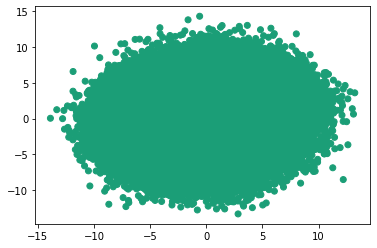

In [5]:
def plot(df):
    from matplotlib import pyplot

    pyplot.scatter(x=df[0], y=df[1], c=df[2], cmap="Dark2")
    pyplot.show()
    
plot(df)

...y analiticamente

In [6]:
def verify(clase0, clase1, sigma):
    from statistics import mean, stdev

    print("Media original clase 0:", [-1] * len(clase0[0]))
    mu = map(mean, zip(*clase0))
    print("Media clase 0:", list(mu)[:-1])

    print("Media original clase 1:", [1] * len(clase1[0]))
    mu = map(mean, zip(*clase1))
    print("Media clase 1:", list(mu)[:-1])

    print("Desvio estandar original:", sigma)
    sigma = [ stdev(x) for x in zip(*clase0) ]
    print("Desvio estandar calculado:", sigma[:-1])
    
verify(clase0, clase1, sigma)

Media original clase 0: [-1, -1, -1]
Media clase 0: [-0.9999019304290625, -1.0082948386846968]
Media original clase 1: [1, 1, 1]
Media clase 1: [0.9987264576434286, 0.9885286496210962]
Desvio estandar original: [2.8284271247461903, 2.8284271247461903]
Desvio estandar calculado: [2.830893658975307, 2.8341558431890626]


## Ejercicio b

Reutilizamos todo nuestro codigo para generar y verificar los datos.

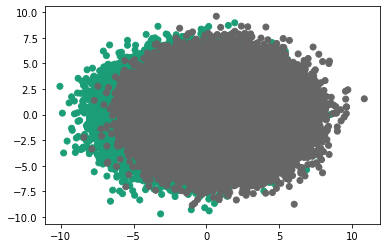

Media original clase 0: [-1, -1, -1]
Media clase 0: [-0.9951577102084161, -0.0039034300284312064]
Media original clase 1: [1, 1, 1]
Media clase 1: [0.999332050386545, -0.005938286982860684]
Desvio estandar original: [2.0, 2.0]
Desvio estandar calculado: [1.9976500874215999, 1.9986018458831125]


In [7]:
sigma = [C] * d

mu = [-1] + [0] * (d - 1)
clase0 = generate_class(n, sigma, mu, 0)

mu = [1] + [0] * (d - 1)
clase1 = generate_class(n, sigma, mu, 1)

df = DataFrame(clase0 + clase1)
plot(df)

verify(clase0, clase1, sigma)

## Ejercicio c

Comenzamos por codificar las dos funciones que definan las curvas de los espirales.

In [8]:
from math import pi

def espiral1(phi):
    return phi / (4*pi)

def espiral2(phi):
    return (phi+pi) / (4*pi)

Para generar un punto uniformemente dentro de un circulo de radio $r$, generamos el punto dentro de un cuadrado de lado $r$ y lo regeneramos si cae fuera del circulo.

In [9]:
def cuniform(r):
    from random import uniform
    from math import dist
    
    x, y = uniform(-r, r), uniform(-r, r)
    return [x, y] if dist([0, 0], [x, y]) <= r else cuniform(r)

A continuacion generamos los puntos y los etiquetamos.

In [10]:
from cmath import polar
points = [ cuniform(1) for _ in range(n) ]

for i, (x, y) in enumerate(points):
    r, phi = polar(complex(x, y))

    condicion = (espiral1(phi) < r < espiral2(phi)) or \
                (espiral1(phi) + 0.5 < r < espiral2(phi) + 0.5) or \
                (espiral1(phi) + 1 < r < espiral2(phi) + 1)
    
    points[i].append(0 if condicion else 1)

Finalmente los graficamos

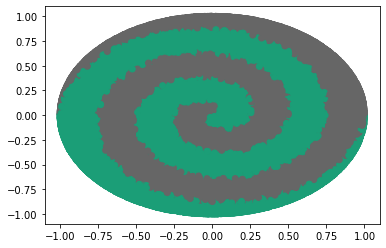

In [11]:
df = DataFrame(points)
plot(df)